In [3]:
import networkx as nx
from networkx.algorithms import bipartite
import seaborn as sns
import matplotlib.pyplot as plt
from src.helper import load_graph_from_json, draw_spring

# 1 Network Analysis: An Introduction

## 1.1 What Is Network Analysis?

Network analysis concerns the measurement and mapping of relationships between entities. Entities can consist of individuals, groups of persons, court decisions, molecules, or any other subject or object.

Applications of network analysis can be found in a variety of academic disciplines, including natural sciences, medical science, social sciences, humanities, and law. For instance, one can map communication of a group of social media users (Figure 1). By mapping who communicates with whom, clusters may emerge of groups of users who more frequently communicate with entities within their cluster than with users outside of their cluster. It can also become apparent who is more central (popular) within the various clusters or in the network as a whole. Furthermore, one may identify so-called 'brokers', individuals who connect clusters of users and consequently form the glue that holds the network together. 

Figure 1: Example of social media network 

<img src="images/ch1/exampleofsocialmedia.png" alt="drawing" width="400"/>

(Source: Wikipedia)

Network analysis relies on the assumption that the structural relationships between entities (e.g. persons) provide relevant information that the attributes of those entities alone cannot offer. The extent to which users are communicative, possess electronic devices, or are member of social platforms does not provide any or sufficient insight into how the users relate to one another. Network analysis reveals those relationships between entities, hence generating relevant information that the features such as communication skills or platform membership alone do not offer.

## 1.2 Origins of Network Analysis

Network analysis comes from graph theory, for which the foundations were laid by Leonhard Euler in 1736, who proved that the problem of 'The Seven Bridges of Königsberg' (currently Kaliningrad, Russia).

<img src="images/ch1/konigsberg.png" alt="drawing" width="400"/>

(Source: Google Maps)


Königsberg was divided by the Pregel River, and it had two islands that were connected to each other and to the city's mainland by seven bridges. The mathematical problem that Euler solved was to design a walk through that would include the two parts of the mainland as well as the two islands where the person would cross each of the bridges exactly once (Figure 3).

<img src="images/ch1/konigsberg_bridges.png" alt="drawing" width="150"/>

 ![image2](images\ch1\konisberg_bridges_2.png)
 
 ![image2](images\ch1\konisberg_bridges_3.png)

Source: Wikipedia

Euler demonstrated that the 'Seven Bridges of Königsberg' problem does not have a solution, and that a walk through town while crossing every bridge exactly once, depends on the number areas (mainland + islands) and on the number of bridges. Euler proved that the desired walk can only take place if the areas are connected and include exactly zero or two areas with an odd number of bridges. Königsberg had four areas and seven bridges at the time. Three areas had three bridges and one area had five bridges. As a result, the rule is violated, as there are four areas with an odd number of bridges.

Seven bridges were bombed in World War II. Five bridges were rebuilt. Interestingly, in terms of graph theory, a Eulerian path became possible after the rebuilt (1->2->3->4->5). Now, two areas (B + C) have two bridges, whereas the other two areas (A + D) have three bridges (edges). This means that there are exactly two nodes with an uneven number of bridges.

![images](images/ch1/konisberg_bridges_4.png)

Source: Wikipedia

## 1.3 What Questions Can Be Answered with Legal Network Analysis?

Network analysis focuses on relational patterns and structures that arise from interaction between the entities (called 'nodes). This approach allows analyzing a great variety of networks, ranging from online cyber communities and corporate relations networks to social movements, political affiliations, sports clubs and scholarly communities. Although there are many different categories of networks, they can more generally be grouped under the headings of technological networks (distribution, transportation, internet) information networks (citation, discourse), and social networks (friends, professional) (Newman 2018).

Network analysis can also be a relevant approach for legal scholars and criminologists. It allows legal scholars to, for instance, analyse legal citation networks. For criminologists, the network analytical approach can be relevant when conducting research on organized crime syndicates and how they are organized.


Network analysis in the legal domain is often applied to court decisions or legislation. In this regard, examples of questions are:

<ul>
    <li>What are the most important precedents?</li>
        <ul>
            <li>Example publication: M. Derlen and J. Lindholm (2014). Goodbye van Gend en Loos, Hello Bosman? Using Network Analysis to Measure the Importance of Individual CJEU Judgments. European Law Journal, 20(5), 667-87. https://doi.org/10.1111/eulj.12077 </li>
        </ul>
    <li>How does case importance change over time?</li>
        <ul>
            <li>Example publication: M. Derlen and J. Lindholm, ‘Is it Good Law? Network Analysis and the CJEU’s Internal Market Jurisprudence’ (2017) 20 Journal of International Economic Law 257-77. https://doi.org/10.1093/jiel/jgx011
            </li>
        </ul>
    <li>Have certain legal topics or legal concepts gained or lost importance over time?</li>
        <ul>
            <li>Example publication: J. Fowler and S. Leon, ‘The Authority of Supreme Court Precedent’ (2008) 30 Social Networks 16-39. https://doi.org/10.1016/j.socnet.2007.05.001</li>
        </ul>
    <li>Which clusters of decisions can be distinguished?</li>
        <ul>
            <li>Example publication: Y. Lupu and E. Voeten (2011). Precedent in International Courts: A Network Analysis of Case Citations by the European Court of Human Rights. British Journal of Political Science, 42, 413-49. https://doi.org/10.1017/S0007123411000433</li>
        </ul>
</ul>

There are also studies that do not target court decisions or legislation, but are still connected to the legal field (and neighboring disciplines):

<ul>
    <li>Patent studies, for instance whether a certain inventor (e.g. Bill Gates) has invented in a wider variety of areas than another inventor (e.g. Mark Zuckerberg).</li>
    <ul>
        <li>Example publication: R. Whalen, A. Lungeanu, L. DeChurch, and N. Contractor (2020). Patent Similarity Data and Innovation Metrics, Journal of Empirical Legal Studies 17(3), 615-639. https://doi.org/10.1111/jels.12261</li>
    </ul>
    <li>How can network analysis by used to provide relevant timely and actionable intelligence for criminal networks?</li>
    <ul>
        <li>Example publication: P. Seidler & R. Adderley (2013). Criminal Network Analysis inside Law Enforcement Agencies: A Data-Mining System Approach under the National Intelligence Model. International Journal of Police Science & Management, 15(4), 323–337. https://doi.org/10.1350/ijps.2013.15.4.321.</li>
    </ul>
    <li>How do law firms partners exercise control over others in the firm?</li>
    <ul>
        <li>Example publication: E. Lazega, D. Krackhardt (2020). Spreading and Shifting Costs of Lateral Control Among Peers: A Structural Analysis at the Individual Level. Quality & Quantity 34, 153–175. https://doi.org/10.1023/A:1004759418226.</li>
    </ul>
</ul>
    
From these examples, it should be noted that legal network analysis can be used for empirical or computational studies of both positive law (law as it exists in codes and decisions), and of social phenomena that are relevant to law (criminal networks, corporate influence, etc.).

## 1.4 Key Concepts of Network Analysis

### A) Nodes & Edges
Networks consist of two key concepts: nodes and edges. Nodes are the smallest unit in a network. As indicated above, nodes can consist of various types of entities: individuals, court cases, documents, words, etc. Edges are the links between two nodes. In graph representation, edges are presented with a line (in undirected graphs) or by an arrow (in directed graphs) that points from one node to another.

Note that in the literature nodes can also be called vertices (singular: vertex) and that edges are referred to as lines, arcs (in directed networks) or edges (in undirected networks).

### B) Undirected Graphs versus Directed Graphs
Graphs can be directed or undirected. Directed can be described as a non-reciprocal relationship (Figure 5). For instance, A sends a message to B, C admires D, or E cites F.

<img src="images/ch1/directed_graph.png" alt="drawing" width="150"/>

Undirected graphs consist of reciprocal relationships (Figure 6). A and B are friends (or: A is friends with B, B is friends with A), or A shakes hands with B. It is not common (although perhaps possible) that a friendship goes from A to B but not from B to A, making it reciprocal.

<img src="images/ch1/undirected_graph.png" alt="drawing" width="150"/>

### C) Network Visualization

We can make observations and inferences by looking at a network. However, when we later ask ourselves questions such as "which are the most central nodes in the network?", we should not lose track of the fact that networks can be drawn in different ways without changing their properties. Some visualizations can even be misleading. The three plots below represent the exact same network (image from Wallis 2007, page 7). If one asks "which node is the most central one?" in relation to this particular network, the drawing on the left probably provides us with the best visualisation to provide the correct answer.

![image](images/ch1/equivalent_viz.png)

### D) Bipartite Graphs

Networks typically deal with relations between a single class of elements. With single class of elements, we mean that the nodes are of a similar type, belong to the same class. For example, we may be interested in citations between cases, friendship between persons, and so forth. In these instances, the classes of the elements are the same: cases, persons, etc. Yet sometimes it is interesting to consider the relationship between two different types of elements. Imagine we want to research what happens when states ratify certain treaties. This must be a bipartite network because we have a relationship between two types of nodes: states and treaties.

Below you can see an example of how a bipartite graph might look.


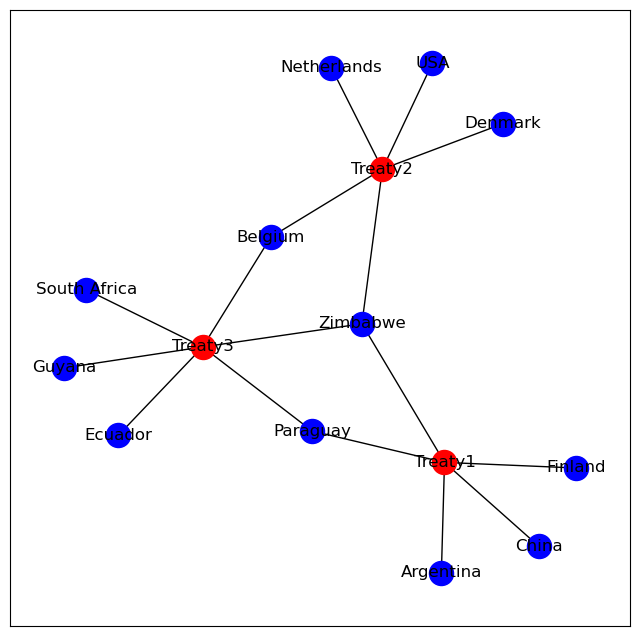

In [2]:
g_treaties = load_graph_from_json("data/g_treaties.json")
states = [x[0] for x in list(g_treaties.nodes(data="bipartite")) if x[1] == 0]
treaties = [x[0] for x in list(g_treaties.nodes(data="bipartite")) if x[1] == 1]
plt.figure(figsize=(8,8))
pos = nx.spring_layout(g_treaties, seed=123)
nx.draw_networkx_nodes(g_treaties, pos=pos, nodelist= states, node_color='blue')
nx.draw_networkx_nodes(g_treaties, pos=pos, nodelist= treaties, node_color='red')
nx.draw_networkx_edges(g_treaties, pos=pos)
nx.draw_networkx_labels(g_treaties, pos=pos);

### E) Graphs versus Networks
Graphs and networks are common terms in the area of network analysis. Strictly speaking, the terms point to different aspects. Graphs consist of a set of nodes and a set of edges between pairs of nodes. A networks consists of a graph plus additional information regarding the nodes. These attributes can include a variety of information, such as, in case the nodes consist of documents, the year in which the document was published, the language of the documents, the creator or author, etc.

### F) Directed Acyclic Graph (DAG)
Graphs that deal with legislation are often (but not necessarily) DAGs. They are directed, because the edges go from one node to another. They are acyclic, because edges commonly do not go, for instance, from A to B to C to A. 

References in case law also serve as a good illustration. A citation network that consists of a number of court decisions that refer to one another is directed: the citation goes from one court decision to another. The network is also acyclic. This is because court decisions commonly only cite cases from the past, not from the future. Would a network be cyclic, it would be possible that a 2016 decision cites a court decision from the year 2020. Exceptions can, however, occur. For example, cases that are published on the same date can reference each other. In an instance of A cites B and B cites A, a loop is created, which makes the graph cyclical.

### G) Power Law Distribution
Citation networks frequently have a Power Law distribution. This means that the frequency distributions are highly skewed: few nodes have a relatively high number of citations, whereas most nodes have a low number of citations. We illustrate this by means of a network of CJEU (Court of Justice of the European Union) case law, where the source nodes consist of cases that are labeled as 'consumer protection'. With source nodes, we mean the cases that were searched and for which the citations in those cases were harvested. In this network, the cases are the nodes and the references in and to the cases the edges. The network consists of 1,614 nodes (cases) and 2,662 edges (references).

Focusing on the number of incoming citations, we plot the distribution of incoming citations among the cases. We do so by means of a histogram, where the horizontal axis shows the number of incoming citations and the vertical axis the number of cases. The results reveal that a relatively small number of cases have a relatively high number of incoming citations, whereas there are a lot of cases that are hardly ever, if at all, cited. The differences are substantial: most cases are hardly cited, whereas few cases are cited over 10 times.

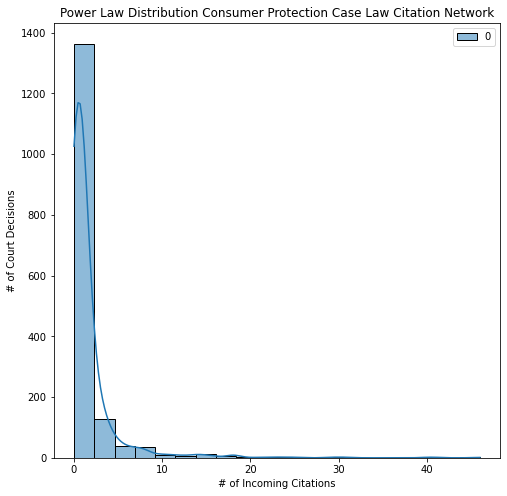

In [3]:
g_consprot = load_graph_from_json("data/g_consprot.json")
plt.figure(figsize=(8,8))
plt.title("Power Law Distribution Consumer Protection Case Law Citation Network")
plt.xlabel("# of Incoming Citations") #add label
plt.ylabel("# of Court Decisions") #add label
sns.histplot(dict(g_consprot.in_degree).values(), stat="count", bins=20, kde=True); 


One of the effects of a Power Law distribution is that it is coupled with preferential attachment. This is also called the 'rich get richer' effect: the nodes with many edges are likely to receive more edges (eg citations) in the future for the mere fact that they already had many edges. Do note that "law" in power law distributions refers to something akin to a "law of nature". It does not have anything to do with the law as in norms or rules.

### H) Node Degree and Node Centrality
Network analysis is a method that can capture how central a node is in a network. This centrality can be an indicator for, for instance, the popularity or relevance of a node in a network.	

Various measures exist to measure the centrality of a node. Some basic measures in legal network analysis are:
- Degree. The total number of edges connected to a node. Degree Centrality normalizes (standardizes) the degree score, resulting in a score between 0 and 1 (by dividing the degree by the number of nodes minus 1 (n-1)).
- Out-Degree. In directed networks, it is possible to calculate the number of edges pointing out of a node. Out-degree centrality is the normalized score of out-degree.
- In-Degree. Directed networks also allow calculating the number of edges pointing to a node. In-degree centrality is the normalized score of in-degree.
- Relative in-degree centrality. This metric provides more weight to more recent nodes. Older nodes are more likely to have incoming edges than more recent nodes. For instance, a court decision from 1998 is more likely to receive many citations than one from 2021 (all other things equal), simply because it has been around longer and consequently has had more opportunities to receive citations. Relative in-degree centrality corrects for this by giving more weight to more recent nodes.
- Betweenness Centrality. This score expresses the relative control that a node exerts over the flow of information within a network, i.e. number of geodesic paths that run through the node, with a geodestic path being the shortest path between two nodes. A simpler way of understanding betweenness centrality is by using the metaphor of glue: what is the glue that keeps the network together? Nodes with a high betweenness centrality score are more of a glue than nodes with a low score - without these nodes, the network is likely to fall apart or to reach another node in a 'quick' way. Another way of describing nodes with a high betweenness centrality is to call them 'brokers' that connect nodes.

We will discuss different metrics in more detail in subsequent chapters. For now, it key to note that there may be more than one way of being "central" or "most important". Intuitively compare nodes 3, 5 and 7 in the Krackhard kite graph below. Which one is the most important?

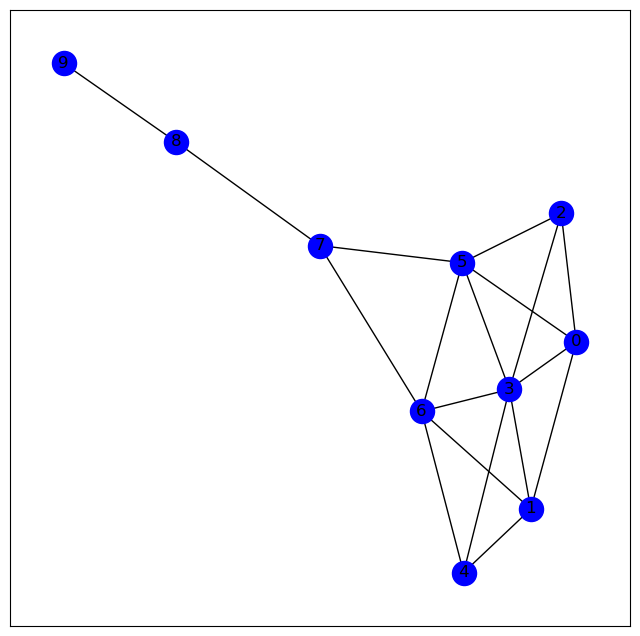

In [4]:
g_kite = nx.krackhardt_kite_graph()
draw_spring(g_kite)

### I) Community Detection

Network analysis allows for the detection of communities in networks. These are sometimes also called "cliques"  or "clusters" but the terminology is not always standard. 

The idea behind community detection is to group together nodes that are tightly connected to each other. In most scenarios, that means that the level of connection within the nodes of a particular community will be higher than outside of it. 

Nodes that belong to the same community are likely to share common attributes or functions, and they often possess different properties than the larger network (Figure 8).

<img src="images/ch1/community_detection.png" alt="drawing" width="250"/>

Various algorithms exist to detect communities. A type of such algorithms works using modularity maximization. 

Modularity is a measure that records the density of connections (edges) within a hypothesized community. 

The modularity can be calculated as the difference between the density of the hypothesized community to the density that a network can be expected to have at random. 

This calculation results in a Q score ranging from a minimum of -1 to a maximum of 1, where $ Q = 0 $ means that the community structure is not better than random. Scores higher than (say) 3, suggest tehe presence of a real community structure. 

A modularity maximization algorithm will try different partionings of the network and keep those that satisfy a certain condition. For example, Louvain Communities (discussed in Chapter 4) partitions the network into potential communities incrementally, keeps the partitions as long as they increase the Q score, and stops when increases stop, or when they drop bellow a set threshold.